# Medical Data Visualizer

## This is where I play with the data and do some testing 

In [5]:
#import pandas 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df = pd.read_csv('../data/medical_examination.csv')
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Making an overweight collomn ⼤

In [25]:
#Add an overweight column to the data. To determine if a person is overweight, 
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


In [22]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

In [23]:
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25.0 else 0)


In [24]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [26]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,bmi
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1,26.927438
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1,31.353579
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1,27.099251


## Normalize the data

making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [27]:
# we can make a python script that we can run to normazile Cholesterol and gluc
def replace_values(value):
    if value > 1:
        return 1
    else:
        return 0

## Convert the Data

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [28]:
# Convert the data into long format
columns_to_melt = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
melted_df = pd.melt(df, id_vars=['cardio'], value_vars=columns_to_melt, var_name='attribute', value_name='value')

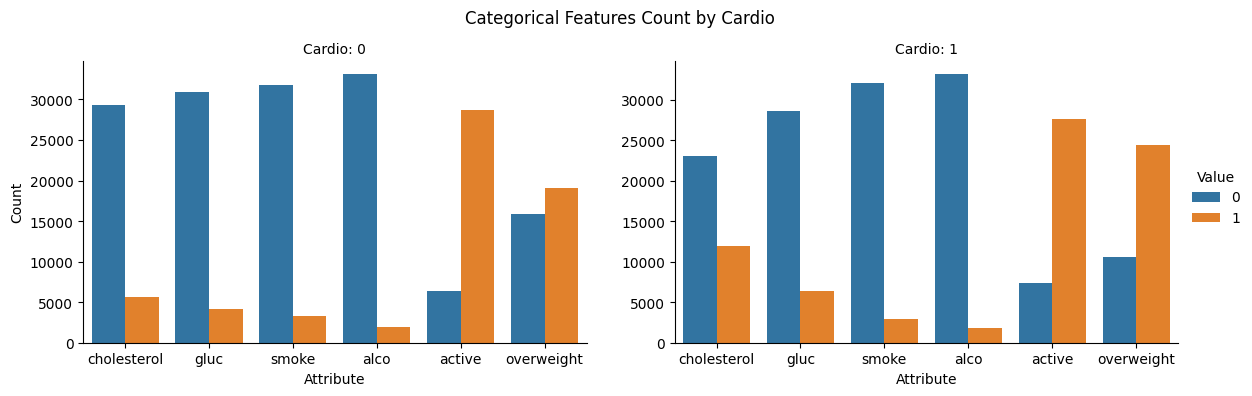

In [33]:
# Create a cat plot using Seaborn's catplot()
g = sns.catplot(data=melted_df, x='attribute', hue='value', kind='count', col='cardio', height=4, aspect=1.5, sharey=False)
g.set_axis_labels('Attribute', 'Count')
g.set_titles('Cardio: {col_name}')
g.legend.set_title('Value')
plt.subplots_adjust(top=0.85)  # Adjust top spacing for the titles
plt.suptitle('Categorical Features Count by Cardio')
plt.show()

In [36]:
# Draw Categorical Plot
def draw_cat_plot():
    # Convert the data into long format
    columns_to_melt = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    melted_df = pd.melt(df, id_vars=['cardio'], value_vars=columns_to_melt, var_name='attribute', value_name='value')

    # Plotting
    # Create a cat plot using Seaborn's catplot()
    g = sns.catplot(data=melted_df, x='attribute', hue='value', kind='count', col='cardio', height=4, aspect=1.5, sharey=False)
    g.set_axis_labels('Attribute', 'Count')
    g.set_titles('Cardio: {col_name}')
    g.legend.set_title('Value')
    plt.subplots_adjust(top=0.85)  # Adjust top spacing for the titles
    plt.suptitle('Categorical Features Count by Cardio')
    plt.show()

## Cleaning Data 🧼

Clean the data. Filter out the following patient segments that represent incorrect data:

    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile


In [34]:
# Clean the data
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

In [35]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,bmi
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0,23.661439
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1,29.384757
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1,26.927438
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1,27.099251


In [38]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,bmi
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679,-0.000025
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573,0.110267
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930,-0.135588
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570,-0.266305
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926,0.862657
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327,0.024925
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212,0.216786
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986,0.167416
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109,0.121930
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274,-0.041652


In [39]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

In [41]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

In [42]:
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(
    corr,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    mask=mask,
    vmax=0.25,
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
    )

<AxesSubplot:>

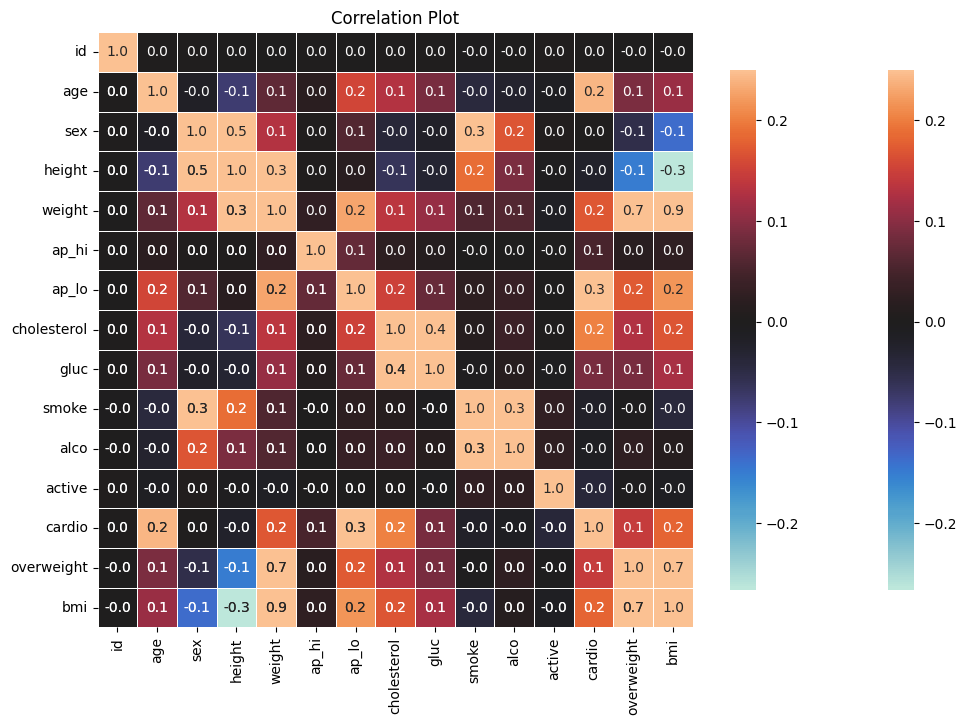

In [43]:
plt.title("Correlation Plot")
plt.show()

## Create a correlation matirx using the dataset ⊹

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.